In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/global_co2.csv")
data

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [ ]:
data = data.fillna(value=data.mean())
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   260 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,1.054754
1,1752,3,0,0,3,0,0,1.054754
2,1753,3,0,0,3,0,0,1.054754
3,1754,3,0,0,3,0,0,1.054754
4,1755,3,0,0,3,0,0,1.054754
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.270000
256,2007,8566,1572,3081,3464,382,68,1.280000
257,2008,8783,1631,3122,3571,388,71,1.300000
258,2009,8740,1585,3056,3620,413,66,1.280000


In [ ]:
X = data.iloc[:, 0].values
Y = data.iloc[:, -1].values
print("X values: \n", X)
print("Y values: \n", Y)

X values: 
 [1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764
 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778
 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792
 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806
 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820
 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834
 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848
 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862
 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876
 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890
 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904
 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918
 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932
 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945

Missing Value: No Missed values in X

Splitting data into training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

In [ ]:
print(X_train)

[1826 1877 1933 1905 1755 1941 1812 2006 1803 1817 1777 1927 1966 1990
 1791 1764 1900 1754 1862 1775 1781 1982 1811 1807 1907 1886 1770 2001
 1889 1805 1958 1831 1802 1753 1969 1855 1887 1837 1761 1897 1952 1992
 1792 1765 1778 1801 1985 1771 1922 1797 1974 1874 1813 2010 1919 1881
 1908 1890 1794 1956 1909 1954 1863 1939 1849 1913 1844 1904 1998 1864
 1751 1845 1846 1820 1800 1799 1836 2008 1892 1774 1979 1894 1829 1851
 1882 1977 2009 1757 1819 1835 1872 1999 2004 1971 1965 1976 1842 1972
 1987 1762 1870 1853 1786 1808 1920 1816 1752 1871 1957 1937 1793 1856
 1883 1975 1768 1789 1884 1804 1915 1949 1879 1785 1779 1934 1865 1914
 1902 1953 1782 1963 1878 1936 1980 1991 1783 1918 1893 1970 1898 1780
 1928 1995 1850 1833 2007 1926 1830 1948 1959 1866 1899 2005 1823 1828
 1776 1916 1832 1994 1925 1997 1790 1981 1944 1809 1891 1839 1967 1821
 1838 1787 1993 1772 1962 1760 1854 1946 2002 1818 1943 1868 1798 1923]


In [ ]:
# print(X_test)

In [ ]:
print(Y_train)

[1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.27 1.05 1.05 1.05 1.05 0.97 1.16
 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.11 1.05 1.05 1.05 1.05 1.05 1.12
 1.05 1.05 0.8  1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 0.68 1.13
 1.05 1.05 1.05 1.05 1.12 1.05 1.05 1.05 1.16 1.05 1.05 1.33 1.05 1.05
 1.05 1.05 1.05 0.77 1.05 0.69 1.05 1.05 1.05 1.05 1.05 1.05 1.12 1.05
 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.3  1.05 1.05 1.23 1.05 1.05 1.05
 1.05 1.19 1.28 1.05 1.05 1.05 1.05 1.1  1.21 1.12 0.94 1.18 1.05 1.14
 1.15 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 0.79 1.05 1.05 1.05
 1.05 1.13 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05
 1.05 0.69 1.05 0.88 1.05 1.05 1.2  1.16 1.05 1.05 1.05 1.1  1.05 1.05
 1.05 1.12 1.05 1.05 1.28 1.05 1.05 1.05 0.83 1.05 1.05 1.24 1.05 1.05
 1.05 1.05 1.05 1.11 1.05 1.13 1.05 1.14 1.05 1.05 1.05 1.05 0.98 1.05
 1.05 1.05 1.11 1.05 0.86 1.05 1.05 1.05 1.12 1.05 1.05 1.05 1.05 1.05]


In [ ]:
# print(Y_test)

Feature Scaling:

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:,:] = sc.fit_transform(X_train[:,:])
# X_test[:,:] = sc.transform(X_test[:,:])

In [ ]:
# print(X_train)

In [ ]:
# print(X_test)

In [ ]:
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_train
print(X_train.shape)
print(Y_train.shape)

(182, 1)
(182, 1)


LinearRegression :

In [ ]:
from sklearn.linear_model import LinearRegression
# Y_train = Y_train.reshape(1, -1)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Text(0, 0.5, 'CO2 production (per capita)')

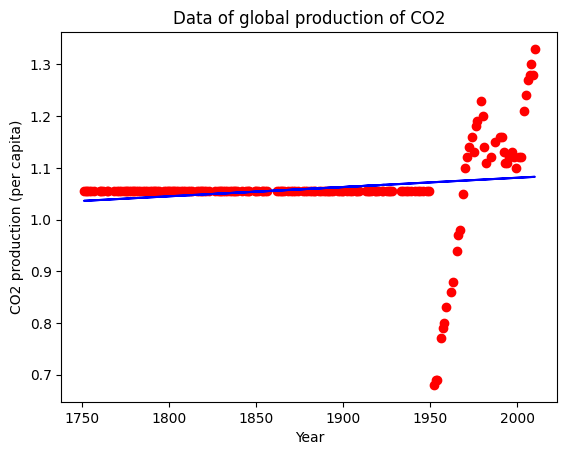

In [ ]:
plt.scatter(X_train, Y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Data of global production of CO2")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")

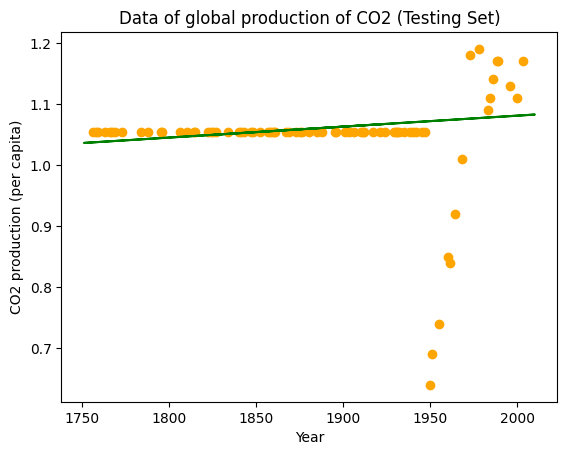

In [ ]:
plt.scatter(X_test, Y_test, color="orange")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Data of global production of CO2 (Testing Set)")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

Polynomial Regression :

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train)

LinearRegression()

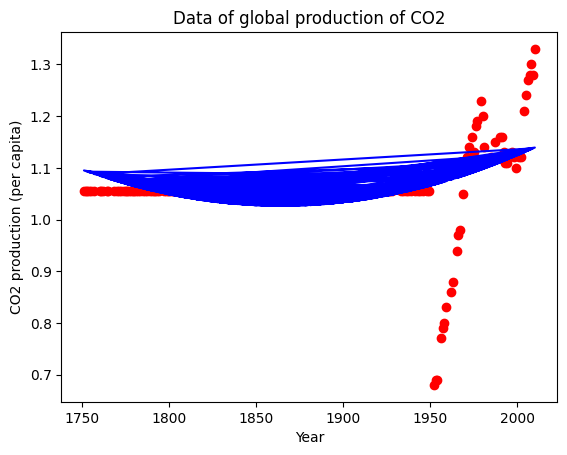

In [ ]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.title("Data of global production of CO2")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

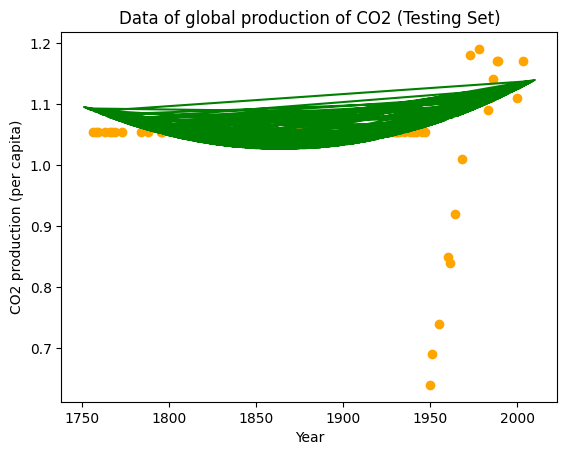

In [ ]:
plt.scatter(X_test, Y_test, color = 'orange')
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)), color = 'green')
plt.title("Data of global production of CO2 (Testing Set)")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

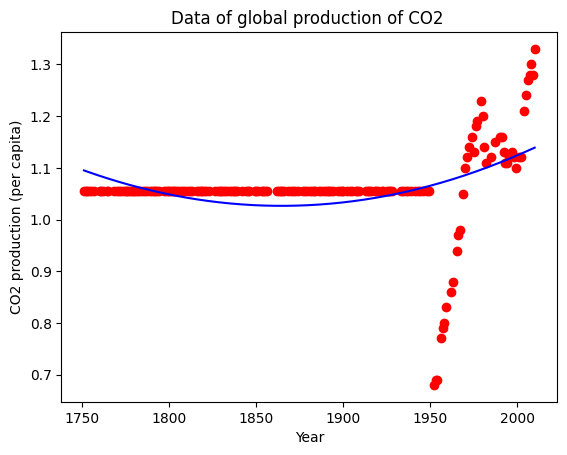

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title("Data of global production of CO2 ")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

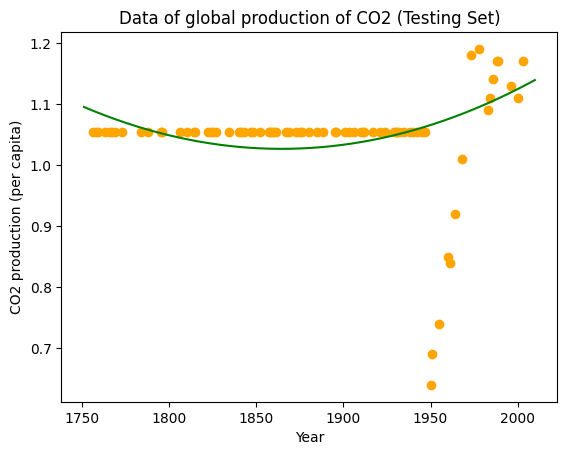

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, Y_test, color = 'orange')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green')
plt.title("Data of global production of CO2 (Testing Set)")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

Multiple Linear Regression:

In [ ]:
# Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1.08 1.11]
 [1.06 1.05]
 [1.08 1.17]
 [1.05 1.05]
 [1.07 1.05]
 [1.07 1.05]
 [1.04 1.05]
 [1.05 1.05]
 [1.04 1.05]
 [1.06 1.05]
 [1.07 1.05]
 [1.05 1.05]
 [1.08 1.18]
 [1.06 1.05]
 [1.07 0.74]
 [1.04 1.05]
 [1.08 1.14]
 [1.07 1.05]
 [1.06 1.05]
 [1.06 1.05]
 [1.07 0.84]
 [1.04 1.05]
 [1.05 1.05]
 [1.08 1.17]
 [1.07 0.64]
 [1.06 1.05]
 [1.05 1.05]
 [1.08 1.19]
 [1.05 1.05]
 [1.08 1.17]
 [1.05 1.05]
 [1.05 1.05]
 [1.06 1.05]
 [1.05 1.05]
 [1.07 0.69]
 [1.06 1.05]
 [1.06 1.05]
 [1.07 1.05]
 [1.07 1.05]
 [1.06 1.05]
 [1.04 1.05]
 [1.04 1.05]
 [1.07 1.05]
 [1.06 1.05]
 [1.04 1.05]
 [1.07 1.05]
 [1.06 1.05]
 [1.08 1.13]
 [1.06 1.05]
 [1.06 1.05]
 [1.05 1.05]
 [1.04 1.05]
 [1.06 1.05]
 [1.07 1.05]
 [1.05 1.05]
 [1.07 1.05]
 [1.07 1.05]
 [1.06 1.05]
 [1.05 1.05]
 [1.06 1.05]
 [1.05 1.05]
 [1.04 1.05]
 [1.07 0.85]
 [1.04 1.05]
 [1.06 1.05]
 [1.07 1.05]
 [1.06 1.05]
 [1.07 1.05]
 [1.06 1.05]
 [1.04 1.05]
 [1.07 0.92]
 [1.06 1.05]
 [1.08 1.09]
 [1.08 1.11]
 [1.08 1.01]
 [1.05 1.05]
 [1.04 1.05]

In [ ]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[0.]]
Intercept: [0.72]


Text(0, 0.5, 'CO2 production (per capita)')

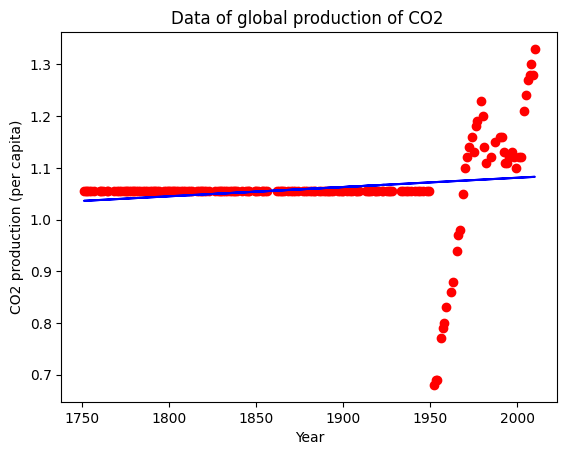

In [ ]:
plt.scatter(X_train, Y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Data of global production of CO2 ")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")

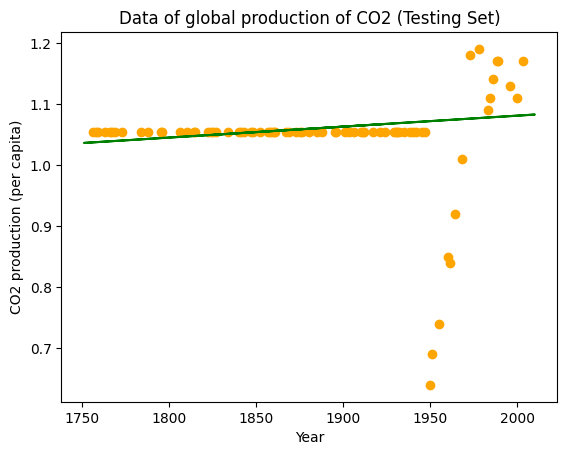

In [ ]:
plt.scatter(X_test, Y_test, color="orange")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Data of global production of CO2 (Testing Set)")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

Tree Algorithm :

In [ ]:
# X = dataset.iloc[:, 1:-1].values
# Y = dataset.iloc[:, -1].values
# print(X)
# print(Y)
X = data.iloc[:, 0:1].values
Y = data.iloc[:, -1:].values
print("X values: \n", X)
print("Y values: \n", Y)

X values: 
 [[1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]
 [1780]
 [1781]
 [1782]
 [1783]
 [1784]
 [1785]
 [1786]
 [1787]
 [1788]
 [1789]
 [1790]
 [1791]
 [1792]
 [1793]
 [1794]
 [1795]
 [1796]
 [1797]
 [1798]
 [1799]
 [1800]
 [1801]
 [1802]
 [1803]
 [1804]
 [1805]
 [1806]
 [1807]
 [1808]
 [1809]
 [1810]
 [1811]
 [1812]
 [1813]
 [1814]
 [1815]
 [1816]
 [1817]
 [1818]
 [1819]
 [1820]
 [1821]
 [1822]
 [1823]
 [1824]
 [1825]
 [1826]
 [1827]
 [1828]
 [1829]
 [1830]
 [1831]
 [1832]
 [1833]
 [1834]
 [1835]
 [1836]
 [1837]
 [1838]
 [1839]
 [1840]
 [1841]
 [1842]
 [1843]
 [1844]
 [1845]
 [1846]
 [1847]
 [1848]
 [1849]
 [1850]
 [1851]
 [1852]
 [1853]
 [1854]
 [1855]
 [1856]
 [1857]
 [1858]
 [1859]
 [1860]
 [1861]
 [1862]
 [1863]
 [1864]
 [1865]
 [1866]
 [1867]
 [1868]
 [1869]
 [1870]
 [1871]
 [1872]
 [1873]
 [18

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state= 0)
regressor.fit(X,Y)

DecisionTreeRegressor(random_state=0)

<ipython-input-191-19970ae420de>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


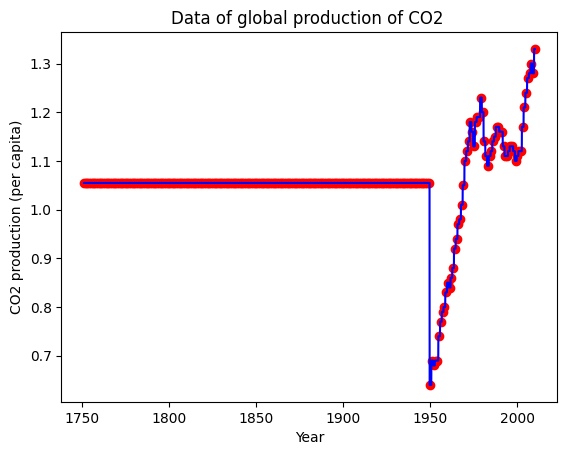

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X,Y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Data of global production of CO2 ")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

In [ ]:
print(regressor.predict([[2011]]))
print(regressor.predict([[2012]]))
print(regressor.predict([[2013]]))
print(regressor.predict([[2014]]))
print(regressor.predict([[2015]]))
print(regressor.predict([[2016]]))

[1.33]
[1.33]
[1.33]
[1.33]
[1.33]
[1.33]


Random Forest Tree Algorithm :

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, random_state=0)
regressor.fit(X,Y)

<ipython-input-193-e537e04ea4ed>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,Y)


RandomForestRegressor(n_estimators=10, random_state=0)

<ipython-input-195-19970ae420de>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


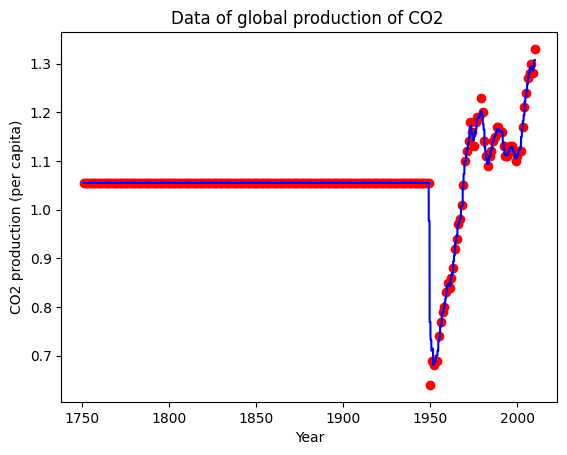

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X,Y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Data of global production of CO2 ")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

In [ ]:
print(regressor.predict([[2011]]))
print(regressor.predict([[2012]]))
print(regressor.predict([[2013]]))
print(regressor.predict([[2014]]))
print(regressor.predict([[2015]]))
print(regressor.predict([[2016]]))

[1.31]
[1.31]
[1.31]
[1.31]
[1.31]
[1.31]


Support Vector Regression :

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.55]


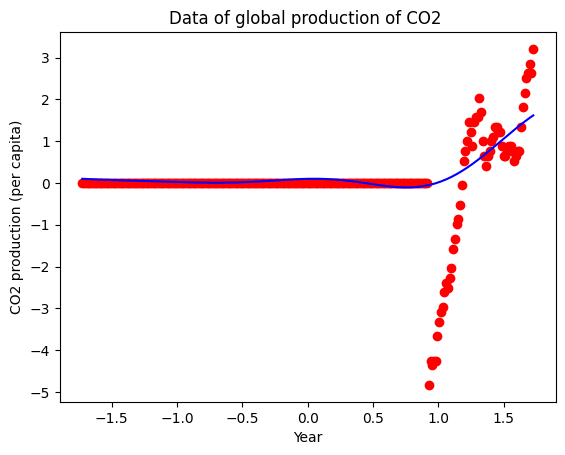

<ipython-input-197-6f38faa6e1b0>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


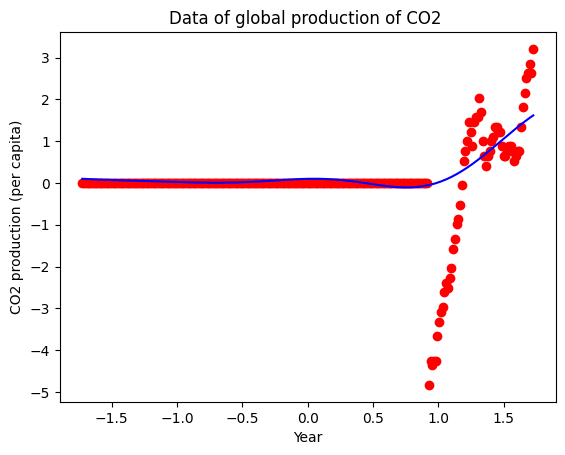

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)
# print(X)
# print(Y)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
# regressor = SVR(kernel="linear")
# regressor = SVR(kernel="poly")
# regressor = SVR(kernel="sigmoid")
# regressor = SVR(kernel="precomputed")
regressor.fit(X,Y)

#predicting a new result
Y_pred = regressor.predict([[2011]])
print(Y_pred)
B = np.reshape(Y_pred, (1,1))
C = sc_Y.inverse_transform(B)
# print(C)

#Visualozation the regression results
plt.scatter(X, Y, color="red")
plt.plot(X, regressor.predict(X), color = "blue")
plt.title("Data of global production of CO2 ")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()

#Visualozation the regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X,Y, color = "red")
plt.plot(X, regressor.predict(X), color = "blue")
plt.title("Data of global production of CO2 ")
plt.xlabel("Year")
plt.ylabel("CO2 production (per capita)")
plt.show()